In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import coffea.util as util
import os, sys
import pandas as pd
import hist
import mplhep as hep
from pathlib import Path
sys.path.append("../../analysisTools/")
import utils
import plotTools as pt
hep.style.use("CMS")
plt.rcParams['font.size'] = 18.0
import json

In [2]:
gen = util.load("genMET.coffea")[0]
bdt = util.load("../../studies/SR_BDT/BDT_Lxy/coffea/skimmed/LxyBDT-based_AllLxy.coffea")[0]
bdt170 = util.load("../../studies/SR_BDT/BDT_Lxy/coffea/skimmed/LxyBDT-based_AllLxy_MET170.coffea")[0]
dfs = utils.get_signal_point_dict(bdt170)

print("Gen Cuts")
cuts = utils.get_signal_list_of_cuts(gen,get_cut_idx=True)
print("BDT Cuts")
cuts = utils.get_signal_list_of_cuts(bdt,get_cut_idx=True)

print("Gen Histos")
print(list(gen.keys()))

print("BDT Histos")
print(list(bdt.keys()))

Gen Cuts
{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut0": "Preselection",
    "cut1": "Pass MET Filters",
    "cut2": "HEM Veto",
    "cut3": "MET Trigger (120 GeV)",
    "cut4": "MET > 200 GeV",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "loose b-veto"
}
BDT Cuts
{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut4": "computing BDT score",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "dPhi(MET,leading jet) > 1.5",
    "cut9": "dPhi(MET,all jets) > 0.75",
    "cut10": "BDT"
}
Gen Histos
['gen_met', 'gen_met_noWgt', 'gen_leadjet_pt_noWgt', 'gen_leadjet_pt', 'gen_met_vs_leadjet_pt_noWgt', 'gen_met_vs_leadjet_pt', 'cutDesc', 'cutflow', 'cutflow_cts', 'cutflow_nevts']
BDT Histos
['bdtScore', 'gen_met_noWgt', 'gen_met', 'gen_leadjet_pt', 'gen_leadjet_pt_noWgt', 'cutDesc', 'cutflow', 'cutflow_cts', 

In [11]:
h = gen['gen_met_noWgt'][{'samp':sum,'cut':'no_presel'}]
h.sum(flow=True).value

29305421.0

## Gen MET plot without cuts

In [3]:
cuts = utils.get_signal_list_of_cuts(gen,get_cut_idx=True)

{
    "all": "No cuts",
    "hasVtx": "Baseline Selection",
    "cut0": "Preselection",
    "cut1": "Pass MET Filters",
    "cut2": "HEM Veto",
    "cut3": "MET Trigger (120 GeV)",
    "cut4": "MET > 200 GeV",
    "cut5": "No b-tagged jets",
    "cut6": "Leading jet |eta| < 2.4",
    "cut7": "Leading jet pT > 80 GeV",
    "cut8": "loose b-veto"
}


In [4]:
h_met = gen['gen_met_noWgt']

deltas = sorted(list(set(dfs.delta)))

for d in deltas:
    m1s = sorted(list(set(dfs.m1[dfs.delta==d])))
    for m1 in m1s:
        cts = sorted(list(set(dfs.ctau[(dfs.delta==d)&(dfs.m1==m1)])))
        plt.figure(figsize=(8,6))
        hists = []
        labels = []
        for ct in cts:
            samp = dfs[(dfs.delta==d)&(dfs.m1==m1)&(dfs.ctau==ct)].name[0]
            hists.append(pt.hget(h_met,samp,'no_presel'))
            labels.append(rf"$c\tau = {int(ct)}$mm")
        hep.histplot(hists,label=labels,density=True)
        plt.xlabel(r'$E_T^\mathrm{miss}$ [GeV]')
        plt.ylabel('A.U.')
        plt.text(0.6,0.5,rf"$m_1 = {m1:.0f}$ GeV"+'\n'+rf"$\Delta = {int(100*d)}$%",ha='left',
                 transform = plt.gca().transAxes,fontsize=18)
        hep.cms.text("Simulation",loc=0,fontsize=18)
        plt.legend(loc='upper right',fontsize=18)
        plt.tight_layout()
        plt.savefig(f'genLevel_plots/genMET/unWgt_delta-{d:.1f}_m1-{int(m1)}.pdf')
        plt.close()

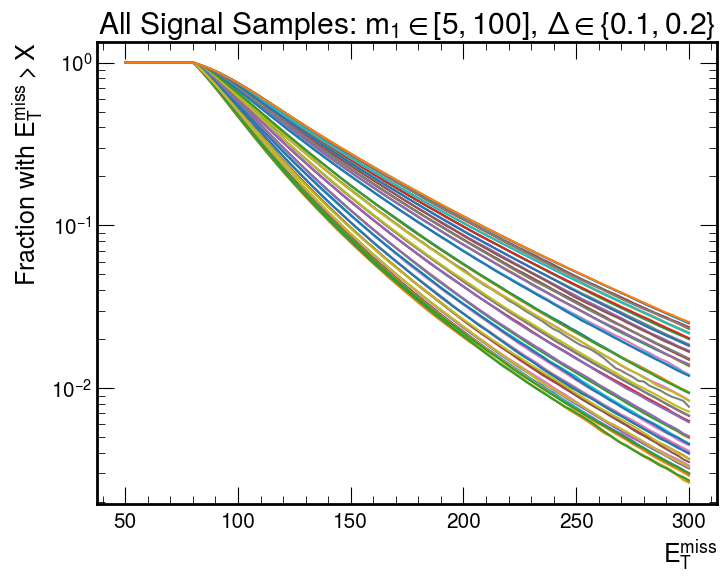

In [5]:
plt.figure(figsize=(8,6))
for s in dfs.name:
    h = pt.hget(h_met,s,'no_presel')
    x,eff,s = pt.makeCutEff(h,lessThan=False)
    plt.plot(x,eff)
plt.xlabel(r"$E_T^\mathrm{miss}$")
plt.ylabel(r"Fraction with $E_T^\mathrm{miss} > X$")
plt.title(r'All Signal Samples: $m_1 \in [5,100],\,\Delta \in \{0.1,0.2\}$')
plt.yscale('log')
plt.savefig("genLevel_plots/genMET_greaterX_allSamples_log.pdf")

In [13]:
h_pt = gen['gen_leadjet_pt_noWgt']

deltas = sorted(list(set(dfs.delta)))

for d in deltas:
    m1s = sorted(list(set(dfs.m1[dfs.delta==d])))
    for m1 in m1s:
        cts = sorted(list(set(dfs.ctau[(dfs.delta==d)&(dfs.m1==m1)])))
        plt.figure(figsize=(8,6))
        hists = []
        labels = []
        for ct in cts:
            samp = dfs[(dfs.delta==d)&(dfs.m1==m1)&(dfs.ctau==ct)].name[0]
            hists.append(pt.hget(h_pt,samp,'no_presel'))
            labels.append(rf"$c\tau = {int(ct)}$mm")
        hep.histplot(hists,label=labels,density=True)
        plt.xlabel(r'Leading Jet Gen $p_T$ [GeV]')
        plt.ylabel('A.U.')
        plt.text(0.6,0.5,rf"$m_1 = {m1:.0f}$ GeV"+'\n'+rf"$\Delta = {int(100*d)}$%",ha='left',
                 transform = plt.gca().transAxes,fontsize=18)
        hep.cms.text("Simulation",loc=0,fontsize=18)
        plt.legend(loc='upper right',fontsize=18)
        plt.tight_layout()
        plt.savefig(f'genLevel_plots/genLeadPt/unWgt_delta-{d:.1f}_m1-{int(m1)}.pdf')
        plt.close()

## Estimate effect of larger gen filter

In [8]:
cfg_dir = "../../configs/"
sig_config = f"{cfg_dir}/sample_configs/signal/signal_v4_2018_aEM.json"
with open(sig_config,"r") as fin:
    sig_js = json.load(fin)

In [66]:
from matplotlib.lines import Line2D
def get_raw_yields(raw_cutflow,dfs,sig_js,cutNumber):
    yields = {}
    init_nevts = {}
    for sigPt in sig_js:
        mchi = sigPt['Mchi']
        dmchi = sigPt['dMchi']
        m1 = mchi-dmchi/2
        delta = dmchi/m1
        ct = sigPt['ctau']
        cut = (dfs.mchi==mchi) & (dfs.dmchi==dmchi) & (dfs.ctau==ct) & (dfs.delta==delta)
        sampName = dfs[cut].name[0]
        yields[sampName] = raw_cutflow[sampName][cutNumber]
        init_nevts[sampName] = sigPt['num_events']
    return yields, init_nevts

def plot_target_nevts(ntarg,cf_bdt,h_gen_met,dfs,sig_js,cutNumber,gen_met_cut=80,plotName="test",close=False):
    yields, init_nevts_fromjs = get_raw_yields(cf_bdt,dfs,sig_js,cutNumber)
    linestyles = ['-','--','-.',':']
    deltas = sorted(list(set(dfs.delta)))
    if 0.4 in deltas:
        deltas.remove(0.4)
    
    for d in deltas:
        ctaus = sorted(list(set(dfs[dfs.delta==d].ctau)))
        plt.figure(figsize=(8,6))
        met_cut_vals = gen_met_cut if type(gen_met_cut) == list else [gen_met_cut]
        for im,metcut in enumerate(met_cut_vals):
            for i,ct in enumerate(ctaus):
                m1s = sorted(list(set(dfs[(dfs.delta==d)&(dfs.ctau==ct)].m1)))
                effs = []
                for m1 in m1s:
                    sampName = dfs[(dfs.delta==d)&(dfs.ctau==ct)&(dfs.m1==m1)].name[0]
                    n_final = yields[sampName]
                    h_met_samp = pt.hget(h_gen_met,sampName,'no_presel')
                    initial_yield = h_met_samp[complex(f"{metcut}j")::sum].value
                    eff = n_final / initial_yield
                    effs.append(eff)
                plt.plot(m1s,ntarg/np.array(effs),color=f'C{i}',markersize=10,marker='.',label=fr"$c\tau$ = {ct}",linestyle=linestyles[im])
        
        plt.title(rf"$\Delta = {d}$, Target {ntarg} in SR")
        lines1 = [Line2D([],[],color=f'C{i}',linestyle='-',label=rf"$c\tau = {ctaus[i]}$ mm") for i in range(len(ctaus))]
        lines2 = [Line2D([],[],color='k',linestyle=linestyles[i],label=rf"Gen $E_T^\mathrm{{miss}} > {met_cut_vals[i]}$") for i in range(len(met_cut_vals))]
        plt.ylim([1e4,7e7])
        plt.legend(handles=lines2+lines1,loc='upper right',fontsize=14,ncol=2)
        #plt.gca().add_artist(leg1)
        #plt.legend(handles=lines2,loc='upper center',fontsize=16,ncol=2)
        plt.yscale('log')
        #plt.axhline(1e6)
        plt.xlabel(r"$m_1$ [GeV]")
        plt.ylabel("Events needed post-filter")
        plt.savefig(f"nEvts_estimation/genMET_cut/{plotName}_delta-{d:.1f}.pdf")
        if close:
            plt.close()
    return yields

def plot_target_nevts_2d(ntarg,cf_bdt,h_gen_met_pt,dfs,sig_js,cutNumber,gen_met_cut=80,gen_pt_cut=80,plotName="test",close=False):
    yields, init_nevts_fromjs = get_raw_yields(cf_bdt,dfs,sig_js,cutNumber)
    
    deltas = sorted(list(set(dfs.delta)))
    if 0.4 in deltas:
        deltas.remove(0.4)
    
    for d in deltas:
        ctaus = sorted(list(set(dfs[dfs.delta==d].ctau)))
        plt.figure(figsize=(8,6))
        for i,ct in enumerate(ctaus):
            m1s = sorted(list(set(dfs[(dfs.delta==d)&(dfs.ctau==ct)].m1)))
            effs = []
            for m1 in m1s:
                sampName = dfs[(dfs.delta==d)&(dfs.ctau==ct)&(dfs.m1==m1)].name[0]
                n_final = yields[sampName]
                h_samp = pt.hget(h_gen_met_pt,sampName,'no_presel')
                initial_yield = h_samp[complex(f"{gen_met_cut}j")::sum,complex(f"{gen_pt_cut}j")::sum].value
                eff = n_final / initial_yield
                effs.append(eff)
            plt.plot(m1s,ntarg/np.array(effs),color=f'C{i}',markersize=10,marker='.',label=fr"$c\tau$ = {ct}")            
        plt.title(rf"$\Delta = {d}$, Target {ntarg} in SR")
        plt.ylim([1e4,7e7])
        plt.legend(loc='best')
        plt.yscale('log')
        #plt.axhline(1e6)
        plt.xlabel(r"$m_1$ [GeV]")
        plt.ylabel("Events needed post-filter")
        plt.savefig(f"nEvts_estimation/genMET_genPt_cut/{plotName}_delta-{d:.1f}_metCut-{gen_met_cut}_ptCut-{gen_pt_cut}.pdf")
        if close:
            plt.close()
    return yields

def get_eff_2d(samp,cf_bdt,h_gen_met_pt,cutNumber,met_cut,pt_cut):
    h_samp = pt.hget(h_gen_met_pt,samp,'no_presel')
    initial_yield = h_samp[complex(f"{met_cut}j")::sum,complex(f"{pt_cut}j")::sum].value
    final_yield = cf_bdt[samp][cutNumber]
    eff = final_yield/initial_yield
    return eff

### Just cut on MET

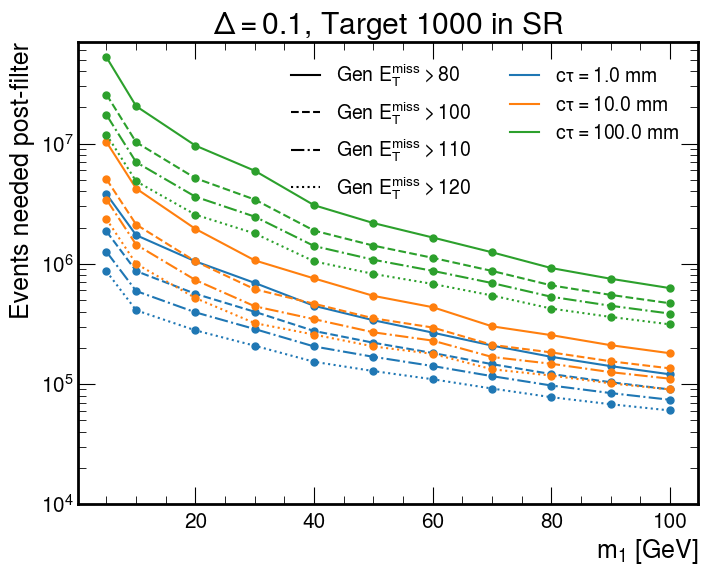

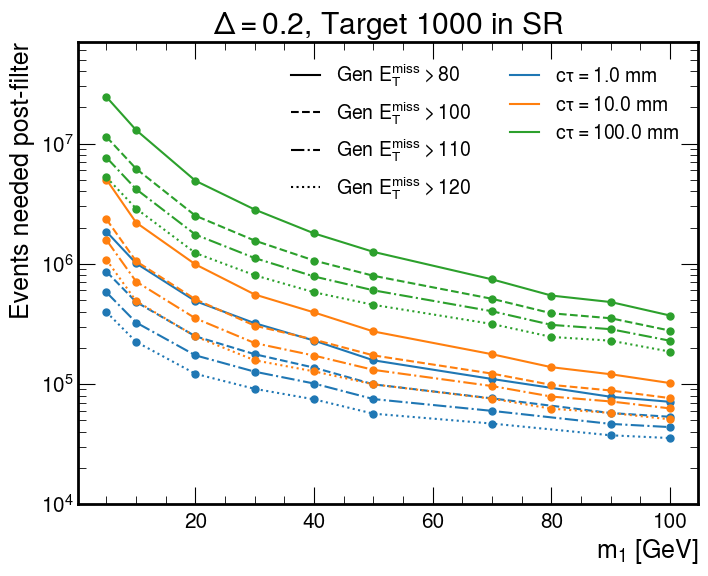

In [67]:
y = plot_target_nevts(1000,bdt['cutflow_nevts'],gen['gen_met_noWgt'],
                  dfs,sig_js,'cut10',gen_met_cut=[80,100,110,120],plotName="MET200Presel_postBDTLxy",close=False)

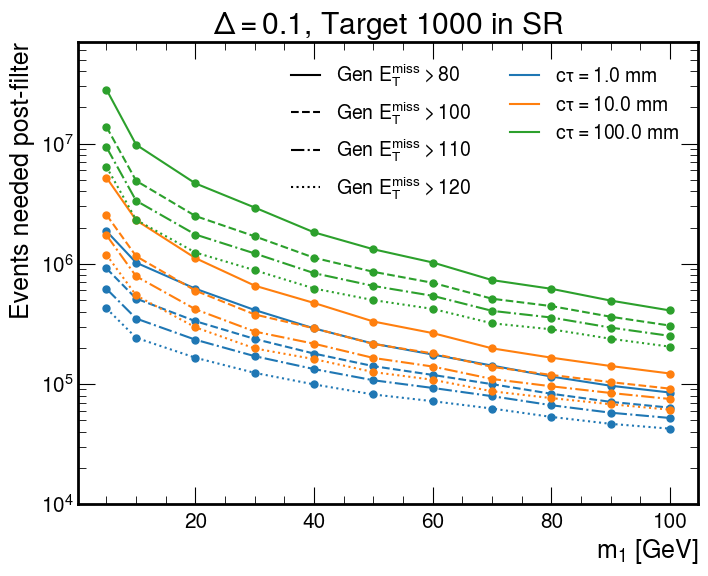

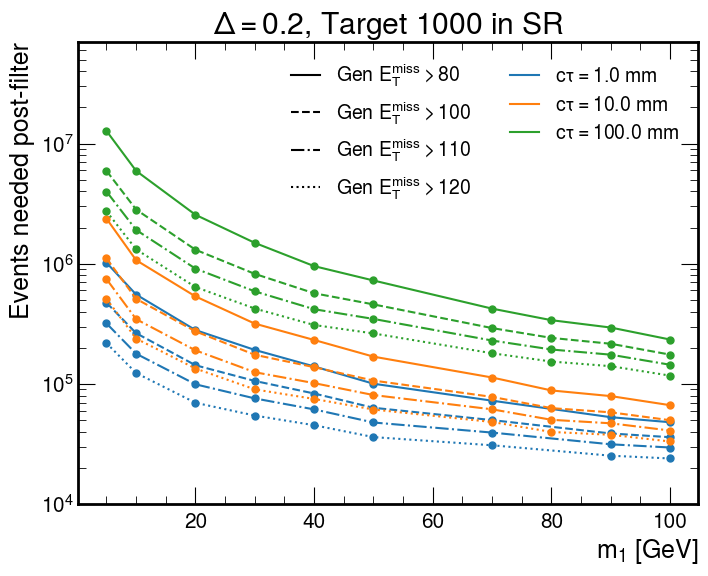

In [68]:
y = plot_target_nevts(1000,bdt170['cutflow_nevts'],gen['gen_met_noWgt'],
                  dfs,sig_js,'cut10',gen_met_cut=[80,100,110,120],plotName="MET170Presel_postBDTLxy")

### cut on MET and pt

In [69]:
met_cuts = [80,90,100,110,120]
pt_cuts = [80,90,100,110,120]
for mcut in met_cuts:
    for pcut in pt_cuts:
        y = plot_target_nevts_2d(1000,bdt['cutflow_nevts'],gen['gen_met_vs_leadjet_pt_noWgt'],
                                  dfs,sig_js,'cut10',gen_met_cut=mcut,gen_pt_cut=pcut,
                                 plotName="MET200Presel_postBDTLxy",close=True)

In [70]:
met_cuts = [80,90,100,110,120]
pt_cuts = [80,90,100,110,120]
for mcut in met_cuts:
    for pcut in pt_cuts:
        y = plot_target_nevts_2d(1000,bdt170['cutflow_nevts'],gen['gen_met_vs_leadjet_pt_noWgt'],
                                  dfs,sig_js,'cut10',gen_met_cut=mcut,gen_pt_cut=pcut,
                                 plotName="MET170Presel_postBDTLxy",close=True)

### Make dictionaries

In [20]:
met_cuts = np.arange(80,130,5)
pt_cuts = np.arange(80,130,5)

h_met_pt = gen['gen_met_vs_leadjet_pt_noWgt']
cutNumber = 'cut10'
res_dict_MET200 = {"name":[],"pt_cut":[],"met_cut":[],"eff":[],"m1":[],"m2":[],"delta":[],"ctau":[],"mchi":[],"dmchi":[]}
res_dict_MET170 = {"name":[],"pt_cut":[],"met_cut":[],"eff":[],"m1":[],"m2":[],"delta":[],"ctau":[],"mchi":[],"dmchi":[]}

for samp in dfs.name:
    for met_cut in met_cuts:
        for pt_cut in pt_cuts:
            eff200 = get_eff_2d(samp,bdt['cutflow_nevts'],h_met_pt,cutNumber,met_cut,pt_cut)
            eff170 = get_eff_2d(samp,bdt170['cutflow_nevts'],h_met_pt,cutNumber,met_cut,pt_cut)
            dsel = dfs[dfs.name==samp]
            
            res_dict_MET200['name'].append(samp)
            res_dict_MET200['met_cut'].append(met_cut)
            res_dict_MET200['pt_cut'].append(pt_cut)
            res_dict_MET200['eff'].append(eff200)
            res_dict_MET200['m1'].append(dsel.m1.item())
            res_dict_MET200['m2'].append(dsel.m2.item())
            res_dict_MET200['delta'].append(dsel.delta.item())
            res_dict_MET200['ctau'].append(dsel.ctau.item())
            res_dict_MET200['mchi'].append(dsel.mchi.item())
            res_dict_MET200['dmchi'].append(dsel.dmchi.item())
            
            res_dict_MET170['name'].append(samp)
            res_dict_MET170['met_cut'].append(met_cut)
            res_dict_MET170['pt_cut'].append(pt_cut)
            res_dict_MET170['eff'].append(eff170)
            res_dict_MET170['m1'].append(dsel.m1.item())
            res_dict_MET170['m2'].append(dsel.m2.item())
            res_dict_MET170['delta'].append(dsel.delta.item())
            res_dict_MET170['ctau'].append(dsel.ctau.item())
            res_dict_MET170['mchi'].append(dsel.mchi.item())
            res_dict_MET170['dmchi'].append(dsel.dmchi.item())
            
res_df_MET200 = pd.DataFrame(res_dict_MET200)
res_df_MET170 = pd.DataFrame(res_dict_MET170)

In [21]:
# fill in missing samples by interpolating across m1
m1s = sorted(list(set(dfs.m1)))
ctaus = sorted(list(set(dfs.ctau)))
deltas = sorted(list(set(dfs.delta)))

for delta in deltas:
    for ctau in ctaus:
        avail_m1s = sorted(list(set(dfs[(dfs.delta==delta)&(dfs.ctau==ctau)].m1)))
        for mc in met_cuts:
            for pc in pt_cuts:
                effs_200 = []
                effs_170 = []
                for m1 in avail_m1s:
                    samp = dfs[(dfs.delta==delta)&(dfs.ctau==ctau)&(dfs.m1==m1)].name.item()
                    effs_200.append(res_df_MET200[(res_df_MET200.name==samp)&(res_df_MET200.met_cut==mc)&(res_df_MET200.pt_cut==pc)].eff.item())
                    effs_170.append(res_df_MET170[(res_df_MET170.name==samp)&(res_df_MET170.met_cut==mc)&(res_df_MET170.pt_cut==pc)].eff.item())
                for m1 in m1s:
                    if m1 not in dfs[(dfs.delta==delta)&(dfs.ctau==ctau)].m1.to_list():
                        m2 = m1 + delta*m1
                        mchi = (m1+m2)/2
                        dmchi = m2-m1
                        mchiName = f"{mchi:.1f}".replace(".","p")
                        dmchiName = f"{dmchi:.1f}".replace(".","p")
                        ctName = f"{int(ctau)}"
                        sampName = f"sig_2018_Mchi-{mchiName}_dMchi-{dmchiName}_ctau-{ctName}"
                        eff200_interp = np.interp(m1,avail_m1s,effs_200)
                        eff170_interp = np.interp(m1,avail_m1s,effs_170)

                        res_dict_MET200['name'].append(sampName)
                        res_dict_MET200['met_cut'].append(mc)
                        res_dict_MET200['pt_cut'].append(pc)
                        res_dict_MET200['eff'].append(eff200_interp)
                        res_dict_MET200['m1'].append(m1)
                        res_dict_MET200['m2'].append(m2)
                        res_dict_MET200['delta'].append(delta)
                        res_dict_MET200['ctau'].append(ctau)
                        res_dict_MET200['mchi'].append(mchi)
                        res_dict_MET200['dmchi'].append(dmchi)

                        res_dict_MET170['name'].append(sampName)
                        res_dict_MET170['met_cut'].append(mc)
                        res_dict_MET170['pt_cut'].append(pc)
                        res_dict_MET170['eff'].append(eff170_interp)
                        res_dict_MET170['m1'].append(m1)
                        res_dict_MET170['m2'].append(m2)
                        res_dict_MET170['delta'].append(delta)
                        res_dict_MET170['ctau'].append(ctau)
                        res_dict_MET170['mchi'].append(mchi)
                        res_dict_MET170['dmchi'].append(dmchi)

In [22]:
res_df_MET200 = pd.DataFrame(res_dict_MET200)
res_df_MET170 = pd.DataFrame(res_dict_MET170)

In [23]:
res_df_MET200.to_csv('raw_evtCount_effs_by_genMET_genpT_cuts_MET200.csv')
res_df_MET170.to_csv('raw_evtCount_effs_by_genMET_genpT_cuts_MET170.csv')

In [72]:
met_cuts = sorted(list(set(res_df_MET200.met_cut)))
pt_cuts = sorted(list(set(res_df_MET200.pt_cut)))

ntarg = 1000
curves_MET170 = {}
curves_MET200 = {}
for mc in met_cuts:
    totals_MET170 = []
    totals_MET200 = []
    for pc in pt_cuts:
        df = res_df_MET200[(res_df_MET200.met_cut==mc) & (res_df_MET200.pt_cut==pc)]
        totals_MET200.append(sum(ntarg/df.eff))
        df = res_df_MET170[(res_df_MET170.met_cut==mc) & (res_df_MET170.pt_cut==pc)]
        totals_MET170.append(sum(ntarg/df.eff))
    curves_MET170[mc] = totals_MET170
    curves_MET200[mc] = totals_MET200

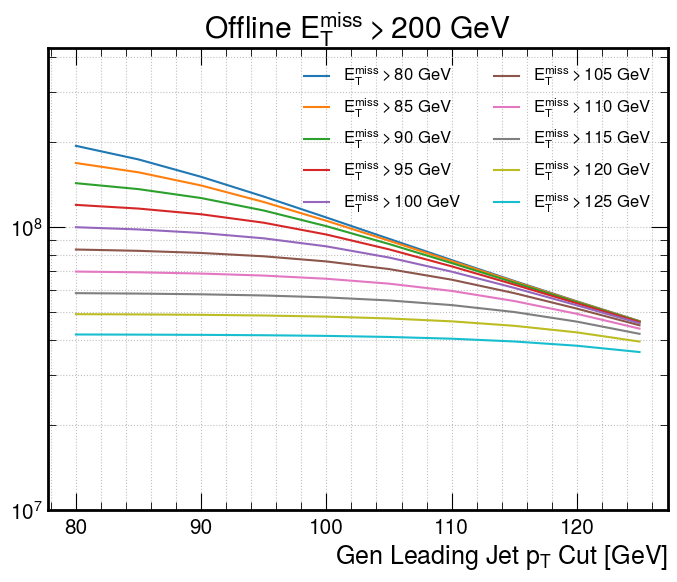

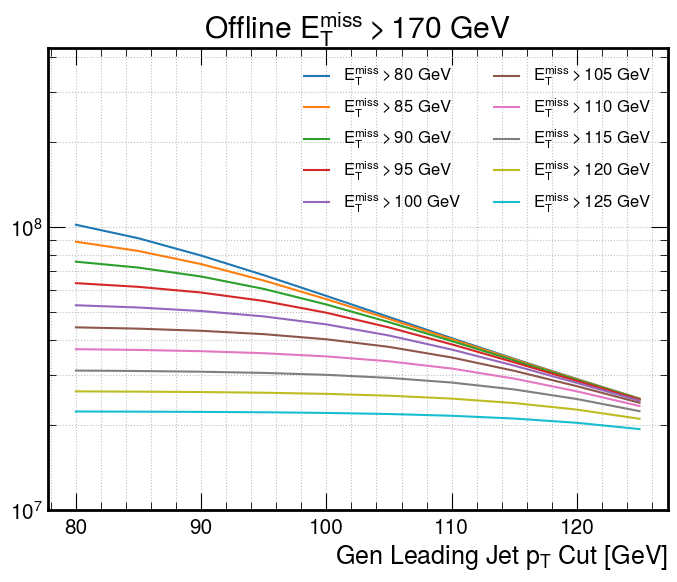

In [80]:
plt.figure(figsize=(8,6))
for mc in met_cuts:
    plt.plot(pt_cuts,curves_MET200[mc],label=rf"$E_T^\mathrm{{miss}} > {mc}$ GeV")
plt.xlabel(r"Gen Leading Jet $p_T$ Cut [GeV]")
plt.title(r"Offline $E_T^\mathrm{miss} > 200$ GeV")
plt.yscale('log')
plt.legend(loc='upper right',ncol=2,fontsize=12)
l,h = plt.gca().get_ylim()
plt.ylim([1e7,4.3e8])
plt.grid(which='both')
plt.savefig("nEvts_estimation/totalEvts_metPtScan_offlineMET200.pdf")

plt.figure(figsize=(8,6))
for mc in met_cuts:
    plt.plot(pt_cuts,curves_MET170[mc],label=rf"$E_T^\mathrm{{miss}} > {mc}$ GeV")
plt.xlabel(r"Gen Leading Jet $p_T$ Cut [GeV]")
plt.legend(ncol=2,fontsize=12)
plt.title(r"Offline $E_T^\mathrm{miss} > 170$ GeV")
plt.yscale('log')
l,h = plt.gca().get_ylim()
plt.ylim([1e7,4.3e8])
plt.grid(which='both')
plt.savefig("nEvts_estimation/totalEvts_metPtScan_offlineMET170.pdf")

# gen MET and jet pT for events in BDT SR

## gen MET CDFs

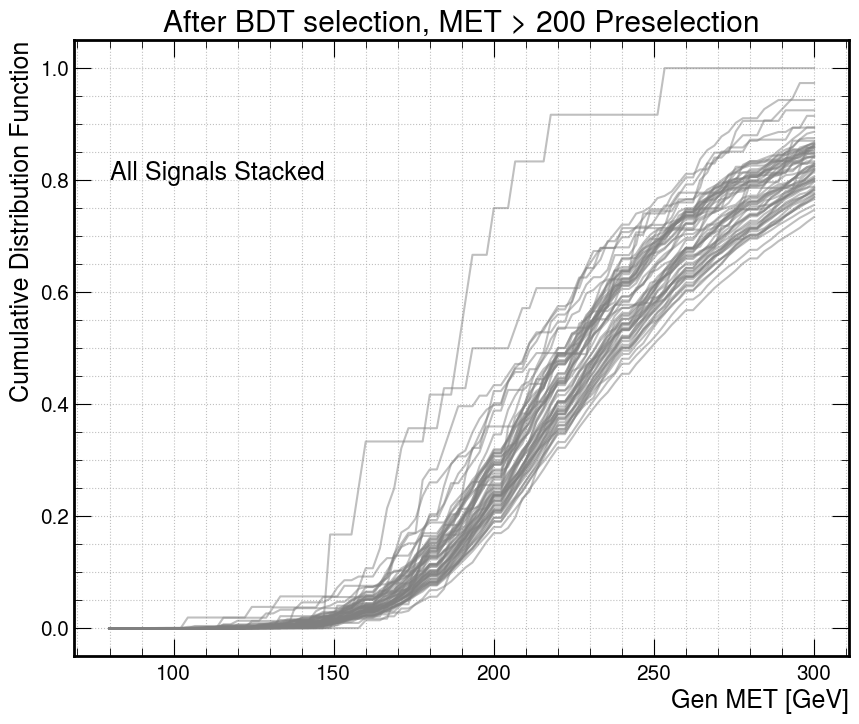

In [30]:
cut = 'cut10'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt['gen_met'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After BDT selection, MET > 200 Preselection")
plt.xlabel("Gen MET [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genMET_CDF_BDTSel_offlineMET200.pdf")

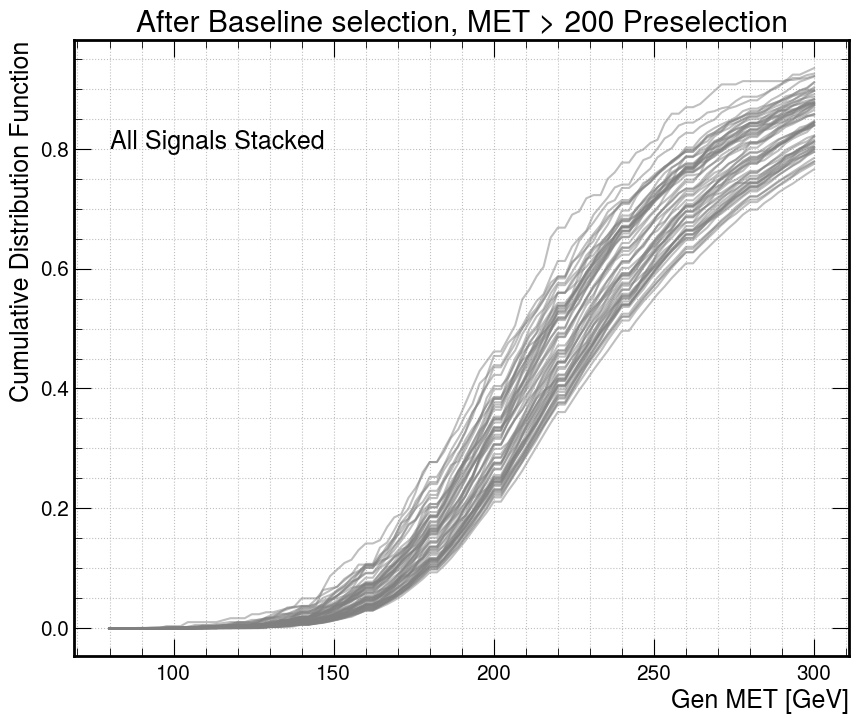

In [32]:
cut = 'cut4'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt['gen_met'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After Baseline selection, MET > 200 Preselection")
plt.xlabel("Gen MET [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genMET_CDF_baselineSel_offlineMET200.pdf")

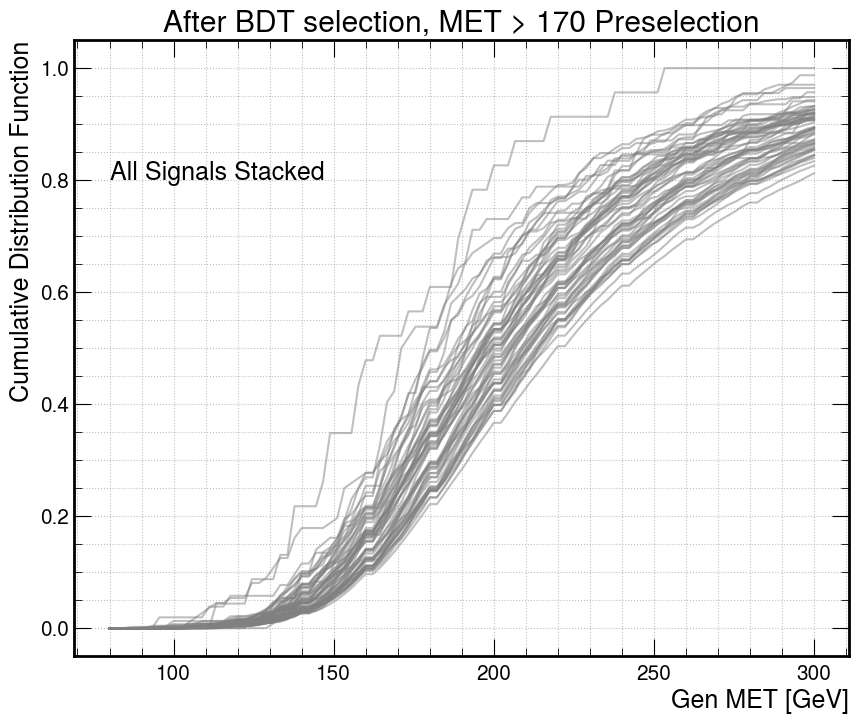

In [33]:
cut = 'cut10'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt170['gen_met'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After BDT selection, MET > 170 Preselection")
plt.xlabel("Gen MET [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genMET_CDF_BDTSel_offlineMET170.pdf")

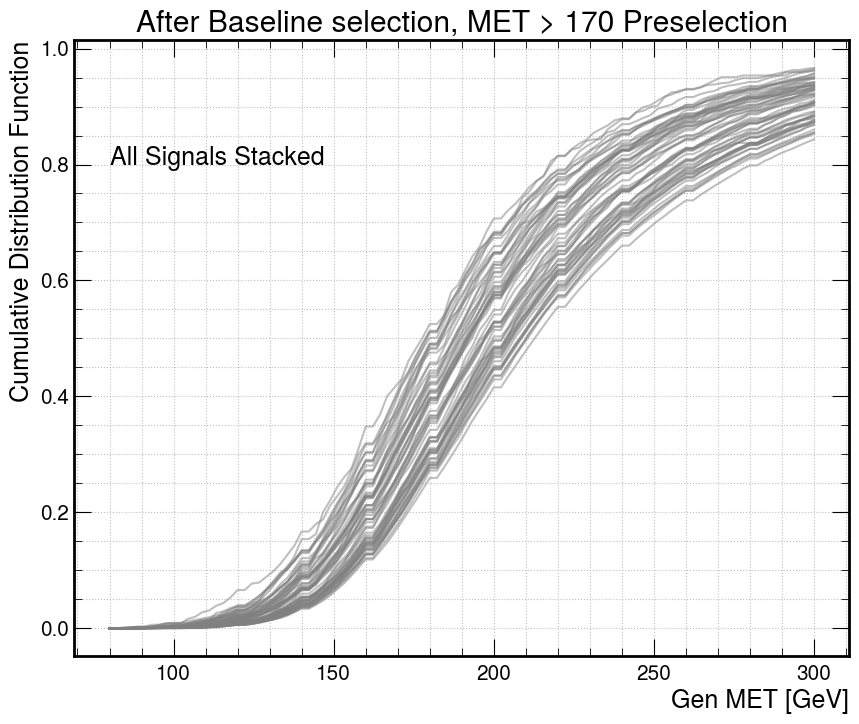

In [34]:
cut = 'cut4'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt170['gen_met'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After Baseline selection, MET > 170 Preselection")
plt.xlabel("Gen MET [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genMET_CDF_baselineSel_offlineMET170.pdf")

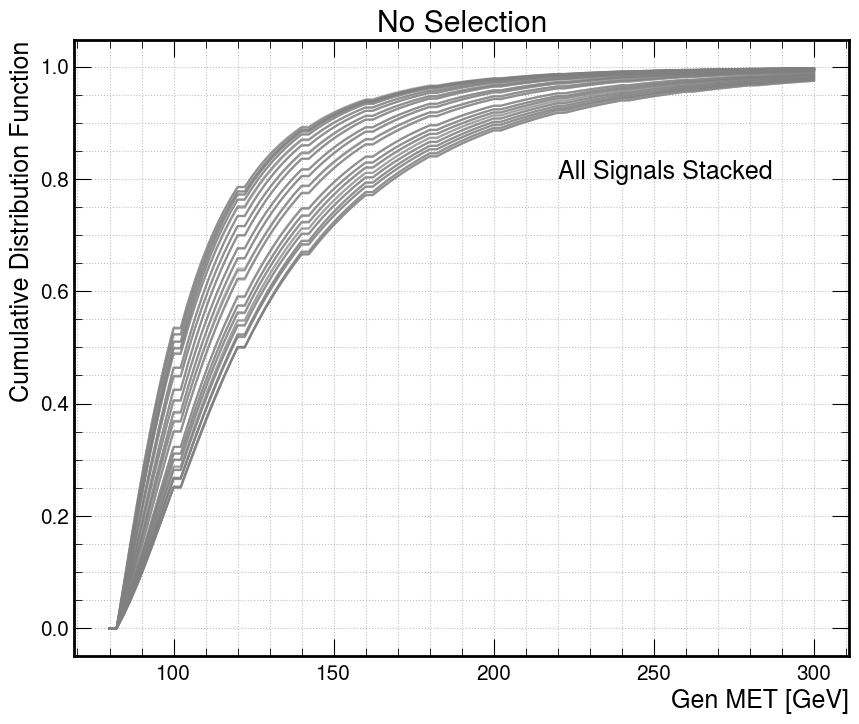

In [37]:
cut = 'no_presel'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = gen['gen_met'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("No Selection")
plt.xlabel("Gen MET [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(220,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genMET_CDF_noSelection.pdf")

## gen jet pT CDFs

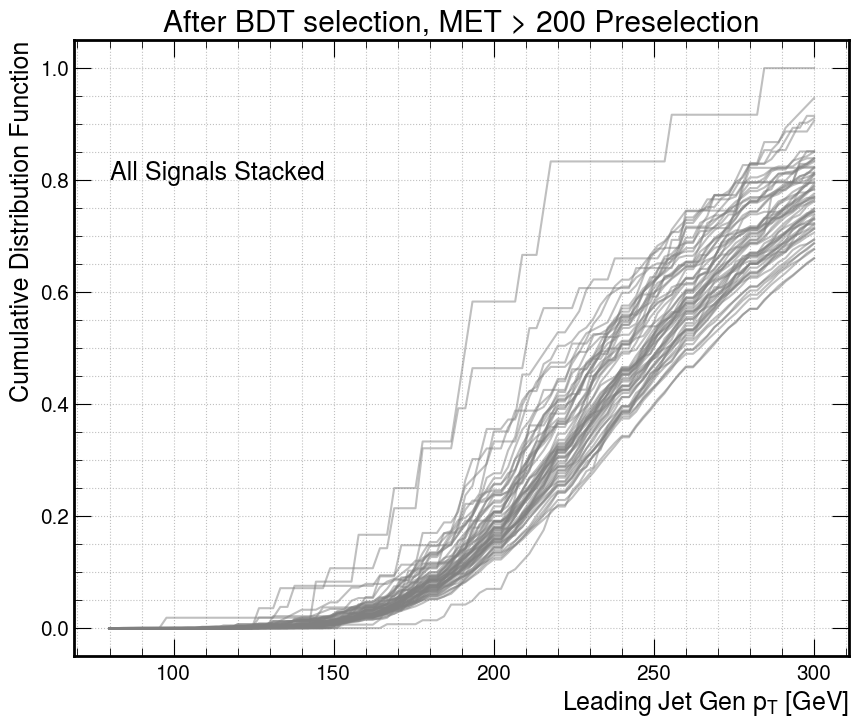

In [39]:
cut = 'cut10'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt['gen_leadjet_pt'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After BDT selection, MET > 200 Preselection")
plt.xlabel(r"Leading Jet Gen $p_T$ [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genLeadPt_CDF_BDTSel_offlineMET200.pdf")

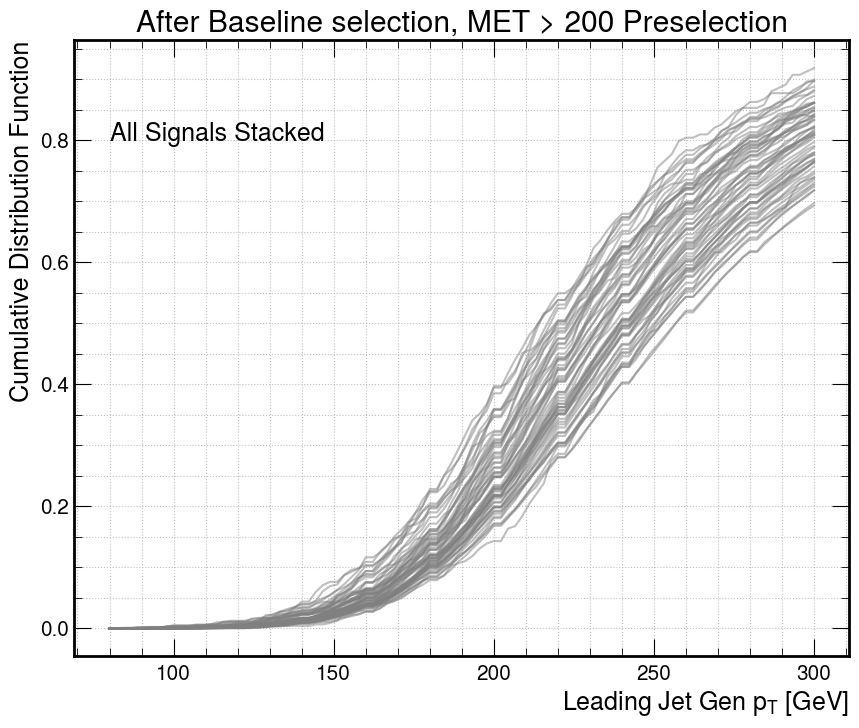

In [40]:
cut = 'cut4'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt['gen_leadjet_pt'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After Baseline selection, MET > 200 Preselection")
plt.xlabel(r"Leading Jet Gen $p_T$ [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genLeadPt_CDF_baselineSel_offlineMET200.pdf")

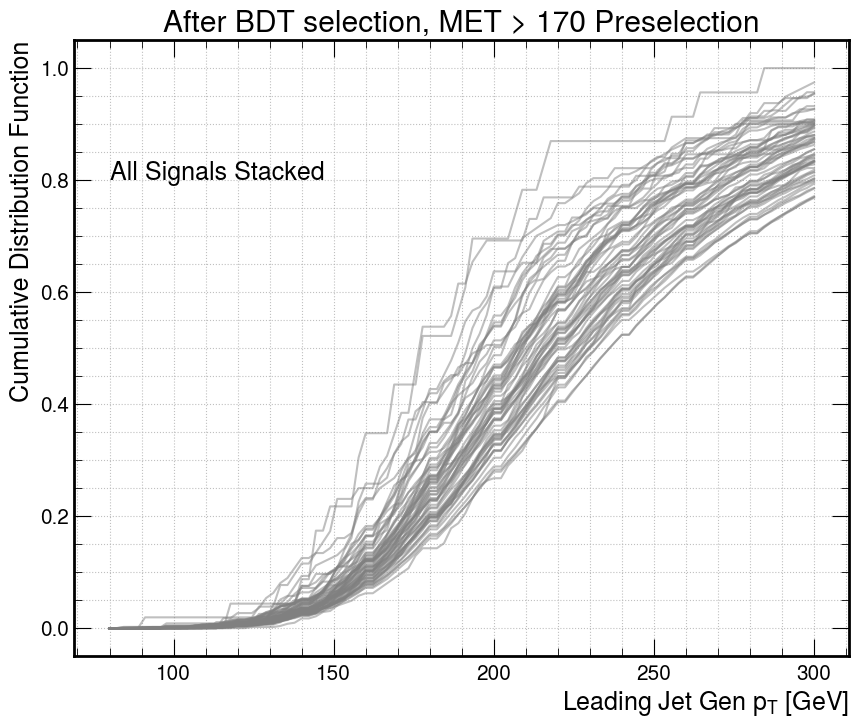

In [41]:
cut = 'cut10'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt170['gen_leadjet_pt'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After BDT selection, MET > 170 Preselection")
plt.xlabel(r"Leading Jet Gen $p_T$ [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genLeadPt_CDF_BDTSel_offlineMET170.pdf")

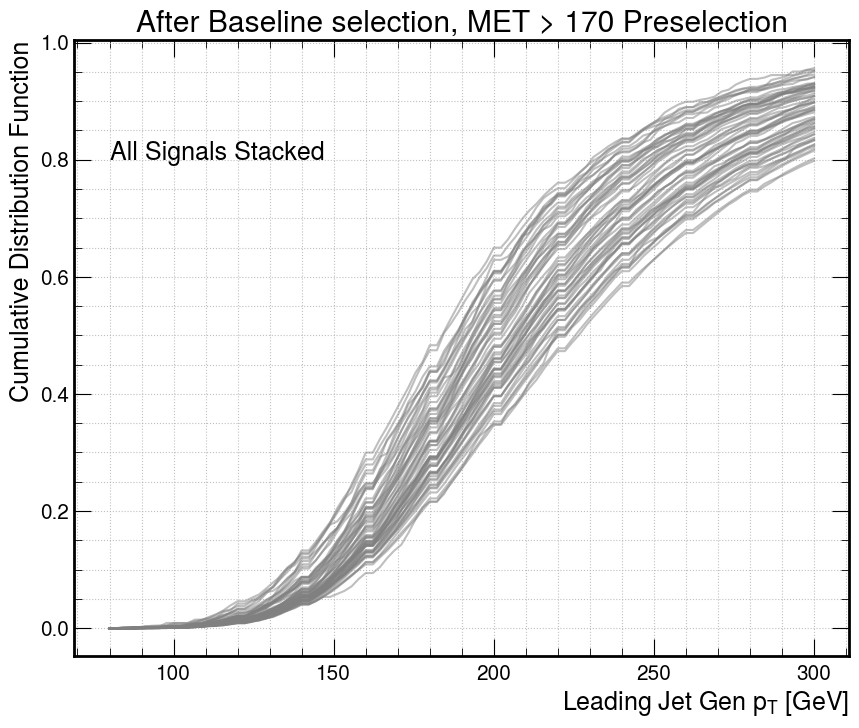

In [42]:
cut = 'cut4'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = bdt170['gen_leadjet_pt'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("After Baseline selection, MET > 170 Preselection")
plt.xlabel(r"Leading Jet Gen $p_T$ [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(80,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genLeadPt_CDF_baselineSel_offlineMET170.pdf")

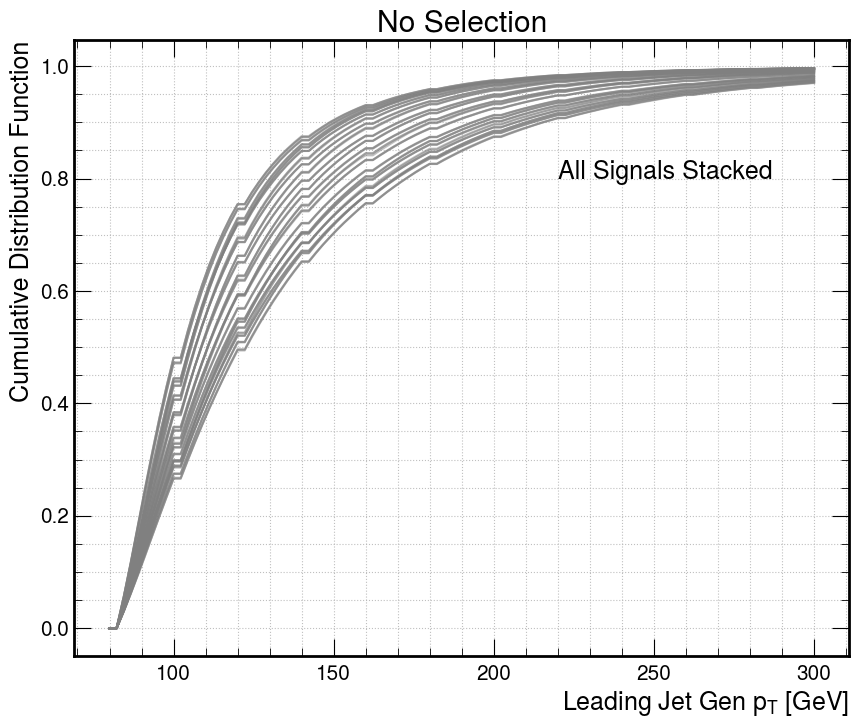

In [43]:
cut = 'no_presel'

plt.figure(figsize=(10,8))
for s in dfs.name:
    h = gen['gen_leadjet_pt'][{"samp":s,"cut":cut}]
    x,eff = pt.makeCDF(h,80,300,bins=100,right=False)
    plt.plot(x,eff,color='gray',alpha=0.5)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.title("No Selection")
plt.xlabel(r"Leading Jet Gen $p_T$ [GeV]")
plt.ylabel("Cumulative Distribution Function")
plt.text(220,0.8,"All Signals Stacked")
plt.savefig("genLevel_plots/genLeadPt_CDF_noSelection.pdf")

# Eff as a function of gen met and gen jet pt

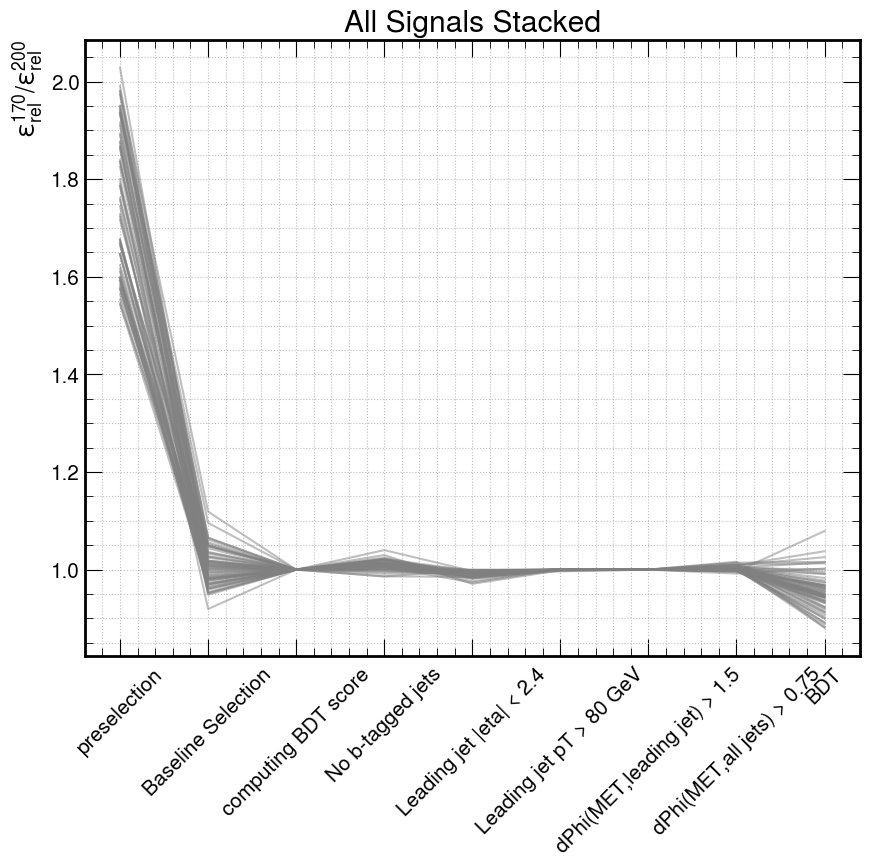

In [48]:
cut = 'cut10'
plt.figure(figsize=(10,8))
nevts_tot = {s:gen['cutflow_nevts'][s]['all'] for s in gen['cutflow_nevts'].keys()}
for s in dfs.name:
    cuts = list(bdt['cutDesc'].keys())
    names = [bdt['cutDesc'][k] for k in cuts]
    names[0] = 'preselection'
    denom_all = nevts_tot[s]

    cf200 = bdt['cutflow_nevts'][s]
    yields200 = np.array([denom_all] + [cf200[c] for c in cuts])
    cf170 = bdt170['cutflow_nevts'][s]
    yields170 = np.array([denom_all] + [cf170[c] for c in cuts])

    effs200 = yields200[1:]/yields200[:-1]
    effs170 = yields170[1:]/yields170[:-1]
    
    x = np.arange(len(effs))
    plt.plot(x,effs170/effs200,color='gray',alpha=0.5)
    plt.xticks(x,labels=names,rotation=45)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.ylabel(r"$\epsilon_\mathrm{rel}^{170}/\epsilon_\mathrm{rel}^{200}$")
plt.title("All Signals Stacked")
plt.savefig("nEvts_estimation/cutflow_relEfficiencyRatios_170over200.pdf")

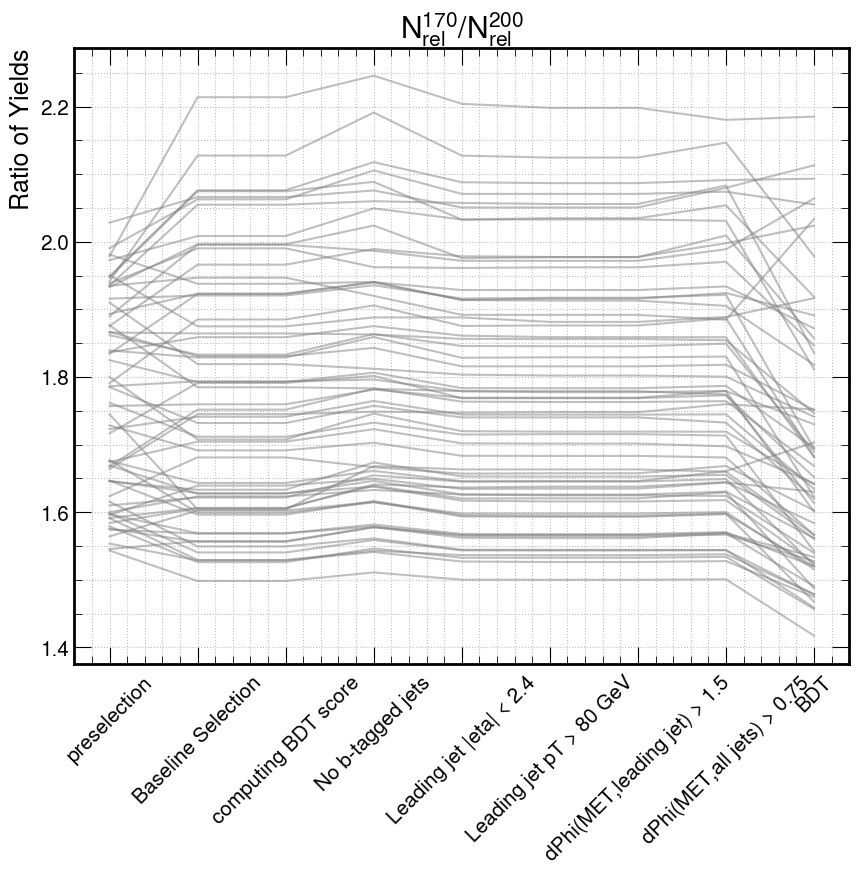

In [49]:
cut = 'cut10'
plt.figure(figsize=(10,8))
nevts_tot = {s:gen['cutflow_nevts'][s]['all'] for s in gen['cutflow_nevts'].keys()}
for s in dfs.name:
    cuts = list(bdt['cutDesc'].keys())
    names = [bdt['cutDesc'][k] for k in cuts]
    names[0] = 'preselection'
    denom_all = nevts_tot[s]

    cf200 = bdt['cutflow_nevts'][s]
    yields200 = np.array([denom_all] + [cf200[c] for c in cuts])
    cf170 = bdt170['cutflow_nevts'][s]
    yields170 = np.array([denom_all] + [cf170[c] for c in cuts])
    
    x = np.arange(len(effs))
    plt.plot(x,yields170[1:]/yields200[1:],color='gray',alpha=0.5)
    plt.xticks(x,labels=names,rotation=45)
#plt.yscale('log')
#plt.ylim([0,0.1])
plt.grid(which='both')
plt.ylabel("Ratio of Yields")
plt.title(r"$N_\mathrm{rel}^{170}/N_\mathrm{rel}^{200}$")
plt.savefig("nEvts_estimation/cutflow_yieldRatios_170over200.pdf")

In [39]:
df200 = pd.read_csv('raw_evtCount_effs_by_genMET_genpT_cuts_MET200.csv')
df170 = pd.read_csv('raw_evtCount_effs_by_genMET_genpT_cuts_MET170.csv')

In [45]:
nevts_tot = {s:gen['cutflow_nevts'][s]['all'] for s in gen['cutflow_nevts'].keys()}
for s in dfs.name:
    denom_all = nevts_tot[s]
    cf200 = bdt['cutflow_nevts'][s]
    num200 = cf200['cut10']
    cf170 = bdt170['cutflow_nevts'][s]
    num170 = cf170['cut10']

    eff200 = num200/denom_all
    eff170 = num170/denom_all

    df_eff200 = df200[(df200.name==s) & (df200.met_cut==80) & (df200.pt_cut==80)].eff.item()
    df_eff170 = df170[(df170.name==s) & (df170.met_cut==80) & (df170.pt_cut==80)].eff.item()

    print(s)
    tol=1e-10
    print('200',eff200-df_eff200<tol)
    print('170',eff170-df_eff170<tol)

sig_2018_Mchi-99p0_dMchi-18p0_ctau-100
200 True
170 True
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100
200 True
170 True
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10
200 True
170 True
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1
200 True
170 True
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100
200 True
170 True
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10
200 True
170 True
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100
200 True
170 True
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10
200 True
170 True
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10
200 True
170 True
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1
200 True
170 True
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1
200 True
170 True
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100
200 True
170 True
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10
200 True
170 True
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100
200 True
170 True
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1
200 True
170 True
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10
200 True
170 True
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100
200 True
170 True
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1
200 True
170 True
